# **Quality_Assesment**

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Dataset
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file

Saving quality_assessment.csv to quality_assessment (1).csv


In [ ]:
# Display shape as a table
df_Quality = pd.read_csv('quality_assessment.csv')

# Show the first 5 rows of the dataset
df_Quality.head()


,assessment_id,diamond_id,lab_name,inspector_name,clarity_grade,color_grade,cut_grade,fluorescence,inclusion_details,quality_status,assessment_date
0,QA000001,DIA006422,AGS,Inspector_1,VS2,D,Good,NaN,Crystal,Rejected,2020-10-18
1,QA000002,DIA016616,AGS,Inspector_2,SI1,E,Fair,Faint,NaN,Requires Further Testing,2023-10-25
2,QA000003,DIA013125,HRD,Inspector_3,VVS1,H,Excellent,NaN,Cloud,Approved,2021-11-02
3,QA000004,DIA002986,HRD,Inspector_4,SI1,E,Fair,Strong,NaN,Approved,2022-05-09
4,QA000005,DIA009236,IGI,Inspector_5,VS2,J,Fair,NaN,Needle,Requires Further Testing,2024-09-12


In [ ]:
# shape of table
df_Quality.shape

(20000, 11)

In [ ]:
# Info
df_Quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   assessment_id      20000 non-null  object
 1   diamond_id         20000 non-null  object
 2   lab_name           20000 non-null  object
 3   inspector_name     20000 non-null  object
 4   clarity_grade      20000 non-null  object
 5   color_grade        20000 non-null  object
 6   cut_grade          20000 non-null  object
 7   fluorescence       14998 non-null  object
 8   inclusion_details  16030 non-null  object
 9   quality_status     20000 non-null  object
 10  assessment_date    20000 non-null  object
dtypes: object(11)
memory usage: 1.7+ MB


In [ ]:
# Interpretation of the Dataset
# We have 20,000 observations and 11 columns.
# All 11 columns are categorical.

In [ ]:
# Describe
df_Quality.describe()

,assessment_id,diamond_id,lab_name,inspector_name,clarity_grade,color_grade,cut_grade,fluorescence,inclusion_details,quality_status,assessment_date
count,20000,20000,20000,20000,20000,20000,20000,14998,16030,20000,20000
unique,20000,12647,4,20000,8,7,4,3,4,3,1826
top,QA000001,DIA018717,HRD,Inspector_1,VS1,D,Good,Faint,Feather,Rejected,2024-05-19
freq,1,7,5040,1,2524,2914,5092,5049,4103,6735,25


In [ ]:
# Interpretation
# We have 11 Categorical Columns

In [ ]:
# Show columns
df_Quality.columns

Index(['assessment_id', 'diamond_id', 'lab_name', 'inspector_name',
       'clarity_grade', 'color_grade', 'cut_grade', 'fluorescence',
       'inclusion_details', 'quality_status', 'assessment_date'],
      dtype='object')

In [ ]:
# Intrepretation
# Assessment_ID → Unique identifier for the assessment process.
# Diamond_ID → Unique identifier assigned to each diamond.
# Lab_Name → Name of the lab conducting the assessment.
# Inspector_Name → Name of the inspector evaluating the diamond.
# Clarity_Grade → Clarity rating assigned to the diamond.
# Color_Grade → Color rating of the diamond.
# Cut_Grade → Cut quality rating of the diamond.
# Fluorescence → Fluorescence property of the diamond (25% missing values).
# Inclusion_Details → Detailed description of inclusions in the diamond (~19.85% missing values).
# Quality_Status → Final quality assessment status of the diamond.
# Assessment_Date → Date of the quality assessment.


In [ ]:
df_Quality.rename(columns={
    'assessment_id': 'Assessment_ID',
    'diamond_id': 'Diamond_ID',
    'lab_name': 'Lab_Name',
    'inspector_name': 'Inspector_Name',
    'clarity_grade': 'Clarity_Grade',
    'color_grade': 'Color_Grade',
    'cut_grade': 'Cut_Grade',
    'fluorescence': 'Fluorescence',
    'inclusion_details': 'Inclusion_Details',
    'quality_status': 'Quality_Status',
    'assessment_date': 'Assessment_Date'}, inplace=True)


In [ ]:
# show columns
df_Quality.columns

Index(['Assessment_ID', 'Diamond_ID', 'Lab_Name', 'Inspector_Name',
       'Clarity_Grade', 'Color_Grade', 'Cut_Grade', 'Fluorescence',
       'Inclusion_Details', 'Quality_Status', 'Assessment_Date'],
      dtype='object')

# **NULL VALUE HANDLING**

In [ ]:
# Check the null values
df_Quality.isnull().sum()

,0
Assessment_ID,0
Diamond_ID,0
Lab_Name,0
Inspector_Name,0
Clarity_Grade,0
Color_Grade,0
Cut_Grade,0
Fluorescence,5002
Inclusion_Details,3970
Quality_Status,0


In [ ]:
# Lets check column wise missing data by %
df_Quality.isnull().sum() * 100 / len(df_Quality)

,0
Assessment_ID,0.00
Diamond_ID,0.00
Lab_Name,0.00
Inspector_Name,0.00
Clarity_Grade,0.00
Color_Grade,0.00
Cut_Grade,0.00
Fluorescence,25.01
Inclusion_Details,19.85
Quality_Status,0.00


In [ ]:
# Here missing data is 25% . Lets check the data type of fluorescence
df_Quality['Fluorescence'].dtype

dtype('O')

In [ ]:
# Find the mode
df_Quality['Fluorescence'].mode()

,Fluorescence
0,Faint


In [ ]:
# lets do the fill na on Fluorescence and replace the missing records with Strong
df_Quality['Fluorescence'].fillna('Faint',inplace=True)

<ipython-input-26-8c7bd8ab2919>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Quality['Fluorescence'].fillna('Faint',inplace=True)


In [ ]:
# Here missing data is 25% . Lets check the data type of Inclusion details
df_Quality['Inclusion_Details'].dtype

dtype('O')

In [ ]:
# Find the mode
df_Quality['Inclusion_Details'].mode()

,Inclusion_Details
0,Feather


In [ ]:
# lets do the fill na on Inclusion_Details and replace the missing records with Feather
df_Quality['Inclusion_Details'].fillna('Feather',inplace=True)

<ipython-input-30-b095af5d1517>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Quality['Inclusion_Details'].fillna('Feather',inplace=True)


In [ ]:
# Check null values
df_Quality.isnull().sum()

,0
Assessment_ID,0
Diamond_ID,0
Lab_Name,0
Inspector_Name,0
Clarity_Grade,0
Color_Grade,0
Cut_Grade,0
Fluorescence,0
Inclusion_Details,0
Quality_Status,0


In [ ]:
# Interpretation
# We dont have the null records

# **EDA**

# **UNIVARIATE ANALYSIS**

In [ ]:
# show columns
df_Quality.columns

Index(['Assessment_ID', 'Diamond_ID', 'Lab_Name', 'Inspector_Name',
       'Clarity_Grade', 'Color_Grade', 'Cut_Grade', 'Fluorescence',
       'Inclusion_Details', 'Quality_Status', 'Assessment_Date'],
      dtype='object')

In [ ]:
# Assessment_ID

In [ ]:
# Count
df_Quality['Assessment_ID'].value_counts().head()

,count
Assessment_ID,
QA000001,1
QA013331,1
QA013338,1
QA013337,1
QA013336,1


In [ ]:
# Drop
df_Quality.drop('Assessment_ID',axis=1,inplace=True)


In [ ]:
# Interpretation
# We have Drop the Assessment_ID Column beacuse it contains unique value.

In [ ]:
# Columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Inspector_Name', 'Clarity_Grade',
       'Color_Grade', 'Cut_Grade', 'Fluorescence', 'Inclusion_Details',
       'Quality_Status', 'Assessment_Date'],
      dtype='object')

In [ ]:
# Diamond ID

In [ ]:
# Count
df_Quality['Diamond_ID'].value_counts().head()

,count
Diamond_ID,
DIA018717,7
DIA012716,7
DIA002055,6
DIA008441,6
DIA008039,6


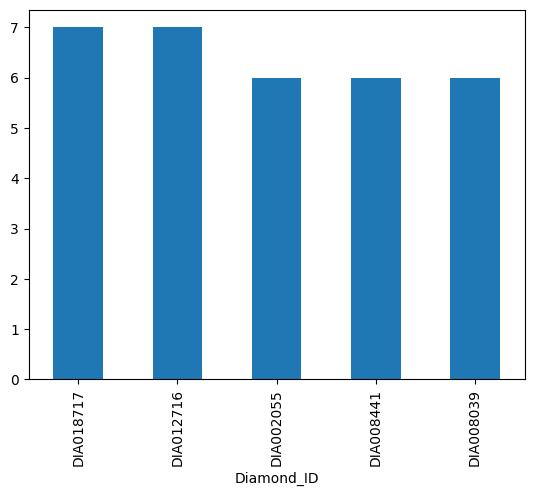

In [ ]:
# Plot the bar chart
df_Quality['Diamond_ID'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Diamond_ID
# DIA018717 - 7
# DIA012716 - 7
# DIA002055 - 6
# DIA008441 - 6
# DIA008039 - 6

In [ ]:
# Shoe columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Inspector_Name', 'Clarity_Grade',
       'Color_Grade', 'Cut_Grade', 'Fluorescence', 'Inclusion_Details',
       'Quality_Status', 'Assessment_Date'],
      dtype='object')

In [ ]:
# Lab Name

In [ ]:
# Count
df_Quality['Lab_Name'].value_counts().head()

,count
Lab_Name,
HRD,5040
GIA,5034
AGS,4981
IGI,4945


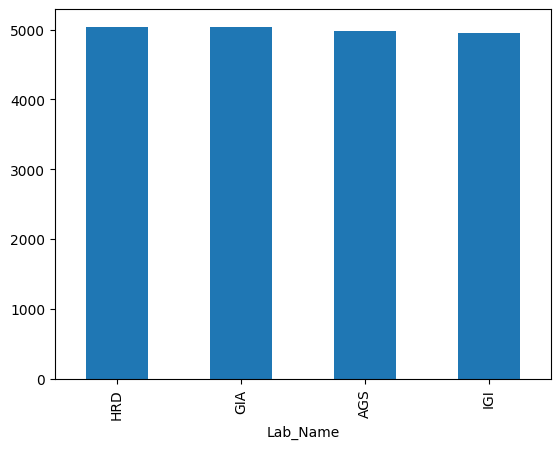

In [ ]:
# Plot
df_Quality['Lab_Name'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Diamond_ID.
# HRD - 5040
# GIA - 5034
# AGS - 4981
# IGI - 4945

In [ ]:
# Show columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Inspector_Name', 'Clarity_Grade',
       'Color_Grade', 'Cut_Grade', 'Fluorescence', 'Inclusion_Details',
       'Quality_Status', 'Assessment_Date'],
      dtype='object')

In [ ]:
#Inspector_Name

In [ ]:
# Count
df_Quality['Inspector_Name'].value_counts().head()

,count
Inspector_Name,
Inspector_1,1
Inspector_13331,1
Inspector_13338,1
Inspector_13337,1
Inspector_13336,1


In [ ]:
# Drop
df_Quality.drop('Inspector_Name',axis=1,inplace=True)

In [ ]:
# Interpretation
# We have Drop the Assessment_ID Column beacuse it contains unique value.

In [ ]:
# Show columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
# Clarity Grade

In [ ]:
# Count
df_Quality['Clarity_Grade'].value_counts().head()

,count
Clarity_Grade,
VS1,2524
SI1,2520
VS2,2515
IF,2500
VVS2,2494


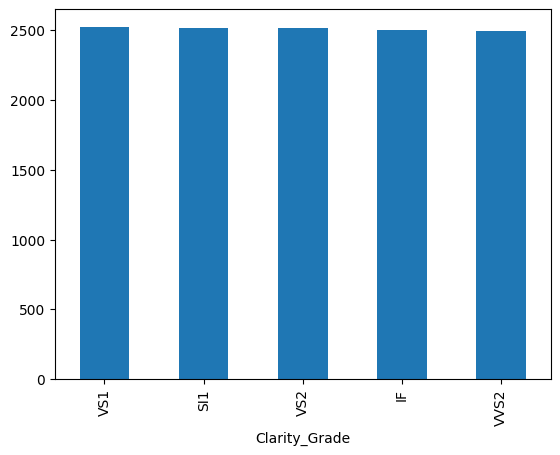

In [ ]:
# Plot
df_Quality['Clarity_Grade'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Clarity_Grade.
# VS1 - 2524
# SI1 - 2520
# VS2 - 2515
# IF - 2500
# VVS2 - 2494

In [ ]:
# columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
#Color Grade

In [ ]:
# COUNT
df_Quality['Color_Grade'].value_counts().head()

,count
Color_Grade,
D,2914
I,2903
J,2861
F,2840
E,2834


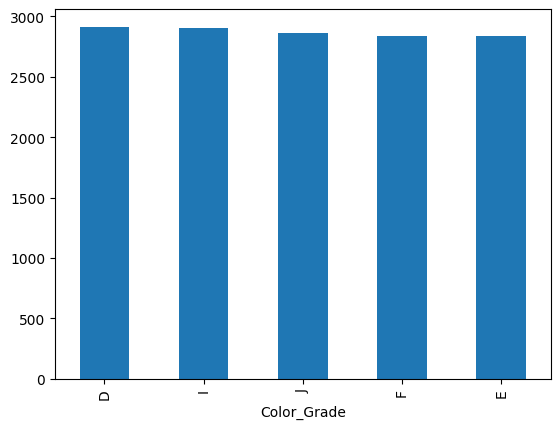

In [ ]:
# Plot
df_Quality['Color_Grade'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
#Interpretation
# We have IMP Info about Color_Grade.
# D - 2914
# I - 2903
# J - 2861
# F - 2840
# E - 2834

In [ ]:
# columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
# Cut Grade

In [ ]:
# Count
df_Quality['Cut_Grade'].value_counts().head()

,count
Cut_Grade,
Good,5092
Fair,5053
Ideal,4931
Excellent,4924


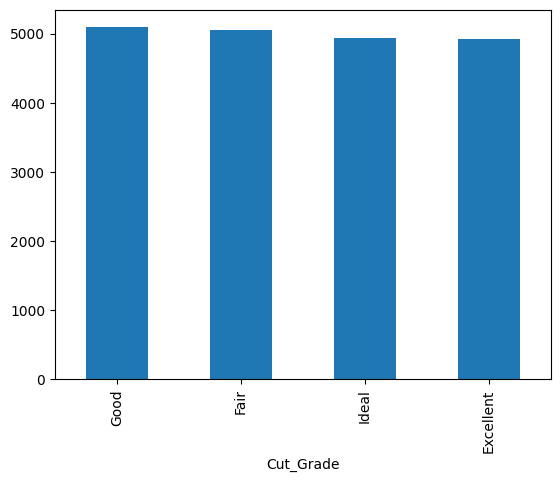

In [ ]:
# Plot
df_Quality['Cut_Grade'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Cut_Grade.
# Good - 5092
# Fair - 5053
# Ideal - 4931
# Excellent - 4924

In [ ]:
# columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
# Fluorescence

In [ ]:
# Count
df_Quality['Fluorescence'].value_counts().head()

,count
Fluorescence,
Faint,10051
Strong,4993
Medium,4956


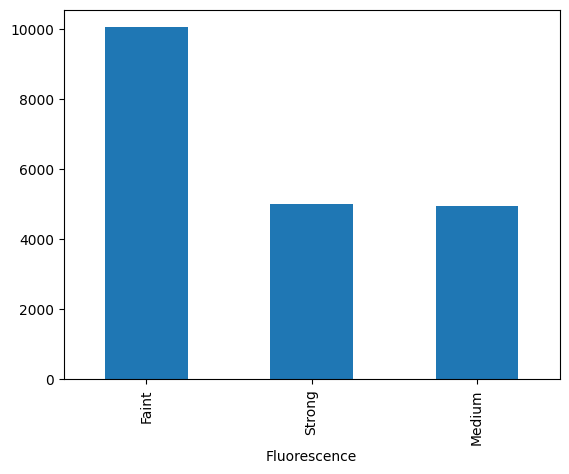

In [ ]:
# Plot
df_Quality['Fluorescence'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Fluorescence.
# Faint - 10051
# Strong - 4993
# Medium - 4956

In [ ]:
# Columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
# Inclusion_Details

In [ ]:
# Count
df_Quality['Inclusion_Details'].value_counts().head()

,count
Inclusion_Details,
Feather,8073
Crystal,4084
Needle,3954
Cloud,3889


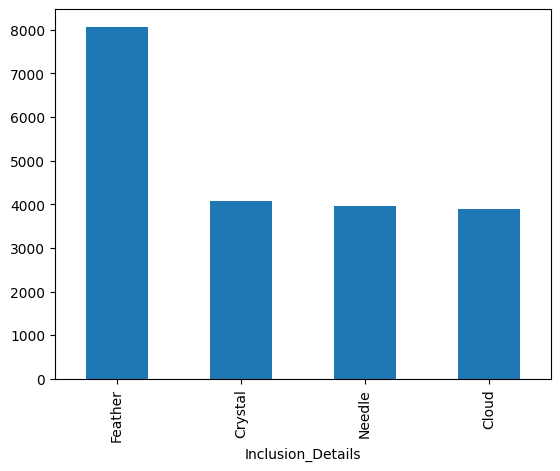

In [ ]:
# Plot
df_Quality['Inclusion_Details'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Inclusion_Details.
# Feather - 8073
# Crystal - 4084
# Needle - 3954
# Cloud - 3889

In [ ]:
# COLUMNS
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
# Quality_Status

In [ ]:
# Count
df_Quality['Quality_Status'].value_counts().head()

,count
Quality_Status,
Rejected,6735
Requires Further Testing,6666
Approved,6599


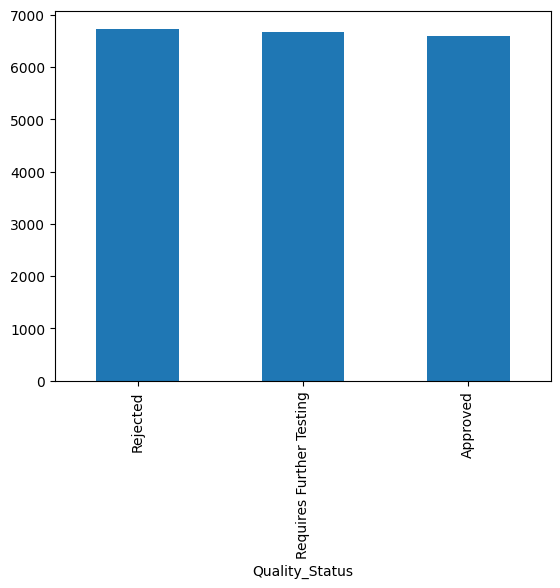

In [ ]:
# Plot
df_Quality['Quality_Status'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have IMP Info about Quality_Status.
# Rejected - 6735
# Requires Further Testing - 6666
# Approved - 6599

In [ ]:
# columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
#Assessment_Date

In [ ]:
# Count
df_Quality['Assessment_Date'].value_counts().head()

,count
Assessment_Date,
2024-05-19,25
2020-05-06,22
2021-01-14,22
2024-08-29,22
2022-07-06,22


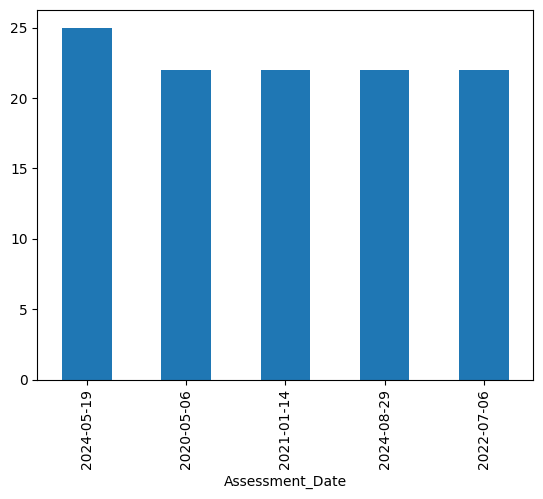

In [ ]:
# Plot
df_Quality['Assessment_Date'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Interpretation
# We have IMP Info about Inclusion_Details.
# 2024-05-19 - 25
# 2020-05-06 - 22
# 2021-01-14 - 22
# 2024-08-29 - 22
# 2022-07-06 - 22

In [ ]:
# columns
df_Quality.columns

Index(['Diamond_ID', 'Lab_Name', 'Clarity_Grade', 'Color_Grade', 'Cut_Grade',
       'Fluorescence', 'Inclusion_Details', 'Quality_Status',
       'Assessment_Date'],
      dtype='object')

In [ ]:
# We have done the Univariate Analysis on Quality Assesment.

# **BIVARIATE ANALYSIS**

In [ ]:
# Bivariate Analysis is not Possible.